# El tratamiento de las variables categóricas

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
datasets_dir = r'..\..\python-ml-course-master\datasets'

In [3]:
filepath = datasets_dir + os.sep + r"ecom-expense/Ecom expense.csv"
data = pd.read_csv(filepath)
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(data["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(data["City Tier"], prefix="City")

In [5]:
column_names = data.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [6]:
data_new = data[column_names].join(dummy_gender)
column_names = data_new.columns.values.tolist()
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [7]:
# Unimos el otro dummy set con las ciudades
data_new = data_new[column_names].join(dummy_city_tier)
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [8]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Female", "Gender_Male", 
                "City_Tier 1", "City_Tier 2", "City_Tier 3", "Record"]

In [9]:
X = data_new[feature_cols]
Y = data_new["Total Spend"]

In [10]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [11]:
# Termino independientes 
print(lm.intercept_)
# Coeficientes
print(lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [12]:
# Unimos los valores de los coeficientes con cada valor de la table (observado)
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049513),
 ('City_Tier 2', 55.1389743092325),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445645)]

In [13]:
lm.score(X, Y) # Más próximo a 1 mejor. R2

0.9179923586131016

El modelo puede ser escrito como
Total_Spend = -79.4171303013718 + 'Monthly Income' * 0.14753898049205738 + 'Transaction Time' * 0.15494612549589634 +
            'Gender_Female' * -131.02501325554624 + 'Gender_Male' * 131.02501325554607 + 'City_Tier 1' * 76.76432601049513 +
            'City_Tier 2' * 55.1389743092325 + 'City_Tier 3' * -131.9033003197277 + 'Record' * 772.2334457445645
            
            
* Si es hombre y vive en Tier1: Total_Spend = -79.4171303013718 + 'Monthly Income' * 0.14753898049205738 + 'Transaction Time' * 0.15494612549589634 + 131.02501325554607 + 76.76432601049513 + 'Record' * 772.2334457445645
* Si es mujer y vive en Tier2: Total_Spend = -79.4171303013718 + 'Monthly Income' * 0.14753898049205738 + 'Transaction Time' * 0.15494612549589634 + -131.02501325554624 + 55.1389743092325 + 'Record' * 772.2334457445645
* 
. . 
. .
. . 
y asi con el resto de ecuaciones, dejando a 1 los coefs que queremos y a cero los que no entran en juego. Tendriamos 6 combinaciones 

In [14]:
data_new["prediction"] = -79.4171303013718 + data_new['Monthly Income'] * 0.14753898049205738 + data_new['Transaction Time'] * 0.15494612549589634 + data_new['Gender_Female'] * (-131.02501325554624) + data_new['Gender_Male'] * 131.02501325554607 + data_new['City_Tier 1'] * 76.76432601049513 + data_new['City_Tier 2'] * 55.1389743092325 + data_new['City_Tier 3'] * (-131.9033003197277) + data_new['Record'] * 772.2334457445645
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [15]:
SSD = sum((data_new['prediction'] - data_new['Total Spend'])**2)

In [16]:
RSE = np.sqrt(SSD/(len(data_new)-len(feature_cols)-1))
RSE

803.1318809818157

In [17]:
sales_mean = np.mean(data_new["Total Spend"])
sales_mean

6163.176415976714

In [18]:
error = RSE/sales_mean
error

0.13031135680294148

Otra manera de calcular las predicciones
data_new["prediction"] = lm.predict(pd.DataFrame(data_new[feature_cols]))

# Enmascarado de variables categoricas redundantes.
Esto se utiliza cuando hay casos como el "genero", cuando no es hombre es mujer. O el "Tier", 
cuando no es del Tier1 ni del Tier2 es del Tier3, por lo que solo harían falta 2 coefs para el Tier

In [19]:
dummy_gender = pd.get_dummies(data["Gender"], prefix="Gender").iloc[:, 1:] # Nos quedamos con todas menos con una 
dummy_city_tier = pd.get_dummies(data["City Tier"], prefix="City").iloc[:,1:]

In [20]:
column_names = data.columns.values.tolist()
data_new = data[column_names].join(dummy_gender)
column_names = data_new.columns.values.tolist()
data_new = data_new[column_names].join(dummy_city_tier)
data_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,1,1,0
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,1,1,0
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,0,0,1
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,0,0,0


In [21]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]

In [22]:
X = data_new[feature_cols]
Y = data_new["Total Spend"]

In [23]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [24]:
# Termino independientes 
print(lm.intercept_)
# Coeficientes
print(lm.coef_)

-133.67781754642238
[ 1.47538980e-01  1.54946125e-01  2.62050027e+02 -2.16253517e+01
 -2.08667626e+02  7.72233446e+02]


In [25]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254959002),
 ('Gender_Male', 262.0500265110948),
 ('City_Tier 2', -21.62535170126276),
 ('City_Tier 3', -208.66762633022296),
 ('Record', 772.2334457445636)]

In [26]:
lm.score(X,Y)

0.9179923586131016

In [27]:
data_new["prediction"] = -133.67781754642238 + data_new['Monthly Income'] * 0.14753898049205744 + data_new['Transaction Time'] * 0.1549461254959002 * data_new['Gender_Male'] * 262.0500265110948 + data_new['City_Tier 2'] * (-21.62535170126276) + data_new['City_Tier 3'] * (-208.66762633022296) + data_new['Record'] * 772.2334457445636
data_new.head()  

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0,4806.441976
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0,4779.771455
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0,40225.737765
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0,8009.099469
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0,3519.479062


## Transformación de variables para conseguir una relación no lineal

Es lineal o no. Lo mejor es usar un scatter plot

In [28]:
filepath = datasets_dir + os.sep + r"/auto/auto-mpg.csv"
data_auto = pd.read_csv(filepath)
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [29]:
data_auto.shape

(406, 9)

In [30]:
%matplotlib inline

Text(0.5, 1.0, 'CV vs MPG')

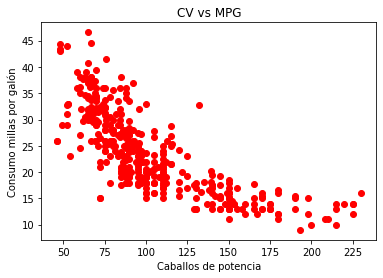

In [31]:
# Para representar el consumo frente a caballos debemos eliminar NaNs
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo millas por galón")
plt.title("CV vs MPG")

### Modelo de regresión linear
* mpg = a + b * horsepower

In [32]:
X = data_auto["horsepower"].fillna(np.mean(data_auto["horsepower"]))
Y = data_auto["mpg"].fillna(np.mean(data_auto["mpg"]))
X_data = X[:, np.newaxis]

In [33]:
lm = LinearRegression()
lm.fit(X_data, Y) # Da error porque espera de X un array bidimensional, en este caso añadimos una columna vacía

LinearRegression()

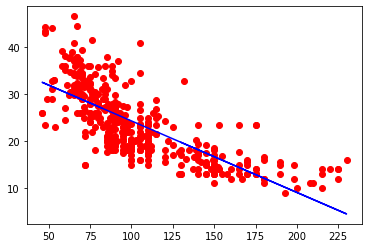

In [34]:
%matplotlib inline
plt.plot(X_data, Y, "ro")
plt.plot(X_data, lm.predict(X_data), color="blue")

In [35]:
lm.score(X_data, Y)

0.574653340645025

In [36]:
SSD = sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, error

(10315.751960060923, 5.0468794808255115, 0.2146277336163346)

## Modelo de regresión cuadrático
* mpg = a + b * horsepower**2

In [37]:
X_data = X**2
X_data = X_data[:, np.newaxis]

In [38]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [39]:
lm.score(X_data, Y)

0.4849887034823205

In [40]:
SSD = sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, error

(12490.35034050193, 5.553410772769819, 0.23616889852998108)

## Modelo de regresión lineal y cuadrático
* mpg = a + b * horsepower + c * horsepower **2

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [42]:
poly = PolynomialFeatures(degree=2)

In [43]:
X_data = poly.fit_transform(X[:,np.newaxis])

In [44]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [45]:
lm.score(X_data, Y)

0.6439066584257469

In [46]:
lm.intercept_

55.02619244708036

In [47]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.02619244708036 -0.43404318 * hp + 0.00112615 * hp **2

In [48]:
def regression_validation(x_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: " + str(SSD) + ", RSE: " + str(RSE) + ", Y_mean:" + str(y_mean) + ", Error:" + str(error*100)) 

In [49]:
# Para realizar pruebas a ver que polinomio nos interesa más 
for d in range(2, 6):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("\nGrado %s:" % (d))
    print("R2 %s:" % lm.score(X_data, Y))
    regression_validation(X_data, Y, lm.predict(X_data))


Grado 2:
R2 0.6439066584257469:
SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean:23.51457286432162, Error:19.63795466190689

Grado 3:
R2 0.6444678885560744:
SSD: 8622.56936742855, RSE: 4.614140736300908, Y_mean:23.51457286432162, Error:19.622473106036676

Grado 4:
R2 0.6467674189704502:
SSD: 8566.799832491353, RSE: 4.5991947315797574, Y_mean:23.51457286432162, Error:19.55891250126878

Grado 5:
R2 0.6547512489366876:
SSD: 8373.171393636556, RSE: 4.546921735442387, Y_mean:23.51457286432162, Error:19.336612073193884


Podemos concluir que no merece la pena añadir más coeficientes dado que este modelo no mejora mucho más.
Preferible en este caso es la simplicidad en el modelo.

## Outliers

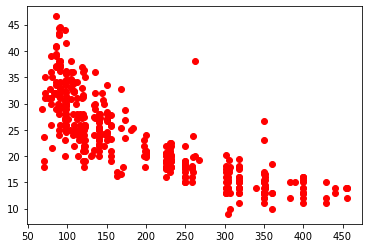

In [57]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [58]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

In [60]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [61]:
lm.score(X, Y)

0.6261049762826918

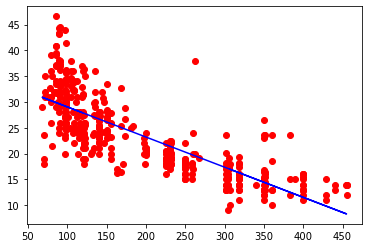

In [62]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X), color="blue")

In [64]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [78]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
307,23.9,8,260.0,90.0,3420,22.2,79,1,oldsmobile cutlass salon brougham
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [79]:
data_auto_clean = data_auto.drop([395,285,305,372,307]) 

In [80]:
X = data_auto_clean["displacement"].fillna(data_auto["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto["mpg"].mean())
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.6462742990193331

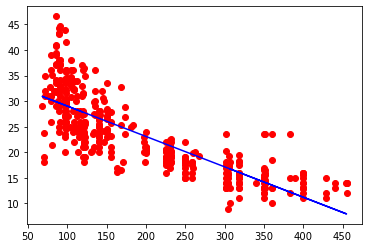

In [81]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X), color="blue")